In [0]:
#Importing required Packages
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
#Connecting to googgle drive
!pip install -U -q PyDrive
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1q8l3Rnx62DN4ZtdhjK72wgXX7QW8SJ7e'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mavoix_ml_sample_dataset.xlsx')  
data = pandas.read_excel('mavoix_ml_sample_dataset.xlsx')

In [0]:
data.fillna(0, inplace=True)#replacing NAN vlues with 0
data=data.drop(['Unnamed: 10'], axis=1)
data.drop(['Application_ID'], axis=1, inplace=True)
#dropping unnecessary columns

##Data Preprocessing

In [0]:
#preprocessing of Other Skills Column
data['Other skills'] = data['Other skills'].str.lower()#converting content to lower case
data['Other skills'] = data['Other skills'].str.replace(" ",'')#replace space with nothing
list_skills=[]
for i in data['Other skills'].values:
  i=re.sub("\((.*?)\)", "", str(i))#removing content present inside ()
  x = re.split(",", str(i))
  for j in x:
    if j not in list_skills:
      list_skills.append(j)
data_science=['rprogramming', 'datascience', 'machinelearning','artificalintelligence', 'gnuoctave','tableau', 'nosql','googleanalytics','flask', 'sixsigma', 'github', 'powerbi', 'linearprogramming','blockchain', 'cloudcomputing','spss','hadoop', 'sas','opencv','bootstrap','mysql','magento', 'sqlite','redux', 'searchengineoptimization', 'ui&uxdesign', 'django', 'restapi', 'neuralnetworks', 'python','algorithms','datastructures','dataanalytics','mathematics', 'mongodb', 'naturallanguageprocessing', 'postgresql', 'sql', 'statisticalmodeling', 'amazonwebservices', 'deeplearning','bigdataanalytics','matlab','computervision', 'imageprocessing','databasemanagementsystem']
html=['java','css','html','javascript', 'php','j2ee','angularjs', 'node.js', 'reactjs','xml', 'jquery','apache', 'sap','jsp','servlets', 'ajax','eclipse', 'kotlin', 'oracle','angular2.0','shellscripting', 'flutter', 'perl', 'angular7.0', 'socialmediamarketing', 'windowsmobileapplicationdevelopment','dart', 'electronjs', 'hibernate', 'springmvc']

#creating 3 category for Other skills-Data science,HTML,other
data['Other skills'] = data['Other skills'].str.lower()
data['Other skills'] = data['Other skills'].str.replace(" ",'')
g=[]
for i in data['Other skills'].values:
  data_science_f=[]
  html_f=[]
  other_f=[]
  i=re.sub("\((.*?)\)", "", str(i))
  o = re.split(",", str(i))
  for j in o:
      if j in data_science:      
        data_science_f.append(1)
      elif j in html:
        html_f.append(1)
      else:
        other_f.append(1)
  data_count=sum(data_science_f)/len(data_science)
  html_count=sum(html_f)/len(html)
  other_count=sum(other_f)/len(other)
  if(data_count>html_count and data_count>other_count):
    large='Data_science'
  elif(data_count<html_count and html_count>other_count):
    large='html'
  else:
    large='Other'

  g.append(large)  

In [0]:
#preprocessing Degree column
degree=[]
for i in data['Degree'].values:
  i=re.search("\((.*?)\)",str(i))#get only content present inside ()
  if i!= None:
    degree.append(i.group(0))
  else:
    degree.append('No_degree')


In [0]:
#Preprocessing Stream column
data['Stream'] = data['Stream'].str.lower()
data['Stream'] = data['Stream'].str.replace("&",'')
data['Stream'] = data['Stream'].str.replace(",",'')
data['Stream'] = data['Stream'].str.replace("and",'')
data['Stream'] = data['Stream'].str.replace("engineering",'')
data['Stream'] = data['Stream'].str.replace(" ",'')

list_skills=[]
for i in data['Stream'].values:
   if i not in list_skills:
      list_skills.append(i)

l_other=['electronicscommunication','production','electronicsinstrumentation', 'digitalcommunicationnetworking', 'electricalelectronics','science','design','electronicstelecommunication(ete)', 'instrumentationelectronics', 'civil','instrumentationcontrol','ceramic', 'commercewithmaths','technology', 'finance', 'computercommunication', 'earthsciences', 'economics', 'motelmanagement','corejava', 'mca', 'softwaresystems', 'education', 'software', 'computernetworkengg', 'kannuruniversity', 'mobileapplicationcloudtechnology','remotesensingwirelesssensor','elearningtechnologies', 'electronicscomputer', 'businessanalyticsbusinessintelligence', 'it', 'financeanalytics', 'physics', 'aerospace', 'commerce', 'marketing', 'sensorsystemstechnology', 'industrialmanagement','biologicalsciencesbio','biotechnology', 'mechatronics','mechanical',]
l_data=['datascience','bigdataanalytics','businessanalytics','dataanalytics', 'artificialintelligence','artificialintelligencemachinelearning','computersciencewiththespecializationindatascience','datasciencedataanalyticsbigdata','advancediplomainbigdataanalytics','mathematics', 'advancedbigdataanalytics','advancedpgdiplomainartificialintelligence','statistics']
s=[]
for i in data['Stream'].values:
  
  if i in l_other:
    s.append("other_degree")
  elif i in l_data:
    s.append("Datascience_degree")
  else:
    s.append("BE_degree")


In [0]:
#preprocessing of 'Performance_PG'
for i in range(len(data['Performance_PG'].values)):
  if data['Performance_PG'].iloc[i]==0:
    data['Performance_PG'].iloc[i]=0
  else:
    k=data['Performance_PG'].iloc[i]
    d=re.split("/", str(k))
    v=int((float(d[0])/int(d[1]))*100)
    data['Performance_PG'].iloc[i]=v


In [0]:
#preprocessing of 'Performance_UG'
for i in range(len(data['Performance_UG'].values)):
  if data['Performance_UG'].iloc[i]==0:
    data['Performance_UG'].iloc[i]=0
  else:
    k=data['Performance_UG'].iloc[i]
    d=re.split("/", str(k))
    v=int((float(d[0])/int(d[1]))*100)
    data['Performance_UG'].iloc[i]=v

In [0]:
#preprocessing of 'Performance_12'
for i in range(len(data['Performance_12'].values)):
  if data['Performance_12'].iloc[i]==0:
    data['Performance_12'].iloc[i]=0
  else:
    k=data['Performance_12'].iloc[i]
    d=re.split("/", str(k))
    v=float(d[0])
    data['Performance_12'].iloc[i]=v

In [0]:
#preprocessing of 'Performance_10'
for i in range(len(data['Performance_10'].values)):
  if data['Performance_10'].iloc[i]==0:
    data['Performance_10'].iloc[i]=0
  else:
    k=data['Performance_10'].iloc[i]
    d=re.split("/", str(k))
    v=float(d[0])
    data['Performance_10'].iloc[i]=v

## Encoding Features

In [0]:

#Drop 'Other Skills' column and concatenate one hot encoded values of 'Other Skills'
data.drop(['Other skills'], axis=1, inplace=True)
g=pd.DataFrame(g)
dummies = pd.get_dummies(g)
data = pd.concat([data, dummies], axis=1)
data.drop(['Current City'], axis=1, inplace=True)

#Drop 'Degree' column and concatenate one hot encoded values of 'Degree'
data.drop(['Degree'], axis=1, inplace=True)
degree=pd.DataFrame(degree)
dummies = pd.get_dummies(degree)
data = pd.concat([data, dummies], axis=1)

#Drop 'Stream' column and concatenate one hot encoded values of 'Stream'
data.drop(['Stream'], axis=1, inplace=True)
s=pd.DataFrame(s)
dummies = pd.get_dummies(s)
data = pd.concat([data, dummies], axis=1)


##PCA and KMeans

In [0]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

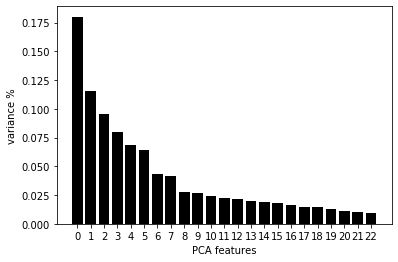

In [376]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca_2d = pca.fit_transform(data_transformed)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(pca_2d)



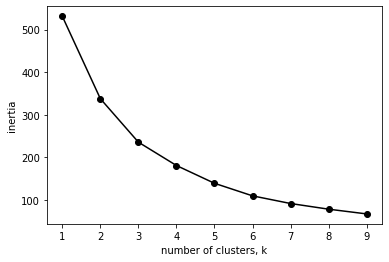

In [377]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
#Shows k=2 is elbow point
kmeans = KMeans(n_clusters=2)
kmeans.fit(PCA_components.iloc[:,:3])
labels_node=kmeans.labels_

In [0]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [0]:
#Connecting to googgle drive
!pip install -U -q PyDrive
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1q8l3Rnx62DN4ZtdhjK72wgXX7QW8SJ7e'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mavoix_ml_sample_dataset.xlsx')  
data = pandas.read_excel('mavoix_ml_sample_dataset.xlsx')

In [381]:
cluster_index=[]
for i in range(2):
  c=ClusterIndicesNumpy(i, labels_node)
  cluster_index.append(c)

for s in range(len(cluster_index)):
  print("cluster:",s)
  f=[]
  for i in cluster_index[s]:
    f.append(data['Application_ID'].iloc[i])
  print(f)

cluster: 0
['ML0004', 'ML0011', 'ML0019', 'ML0021', 'ML0026', 'ML0033', 'ML0040', 'ML0047', 'ML0051', 'ML0054', 'ML0058', 'ML0074', 'ML0076', 'ML0093', 'ML0099', 'ML0106', 'ML0108', 'ML0116', 'ML0131', 'ML0143', 'ML0158', 'ML0170', 'ML0171', 'ML0187', 'ML0188', 'ML0191', 'ML0201', 'ML0203', 'ML0208', 'ML0209', 'ML0211', 'ML0221', 'ML0222', 'ML0224', 'ML0225', 'ML0226', 'ML0227', 'ML0228', 'ML0229', 'ML0230', 'ML0231', 'ML0232', 'ML0233', 'ML0234', 'ML0235', 'ML0236', 'ML0237', 'ML0238', 'ML0239', 'ML0240', 'ML0241', 'ML0242', 'ML0243', 'ML0246', 'ML0247', 'ML0248', 'ML0249', 'ML0250', 'ML0252', 'ML0253', 'ML0254', 'ML0255', 'ML0256', 'ML0257', 'ML0258', 'ML0259', 'ML0262', 'ML0263', 'ML0264', 'ML0265', 'ML0266', 'ML0267', 'ML0269', 'ML0270', 'ML0271', 'ML0272', 'ML0273', 'ML0274', 'ML0275', 'ML0276', 'ML0277', 'ML0278', 'ML0279', 'ML0280', 'ML0282', 'ML0284', 'ML0285', 'ML0286', 'ML0287', 'ML0288', 'ML0289', 'ML0290', 'ML0291', 'ML0292', 'ML0293', 'ML0294', 'ML0296', 'ML0297', 'ML0298'

#By looking into Data point features we can conclude that cluster 0 is cluster of potential candidate for Data Science and cluster 1 is cluster of potential candidates for Web Development Internship

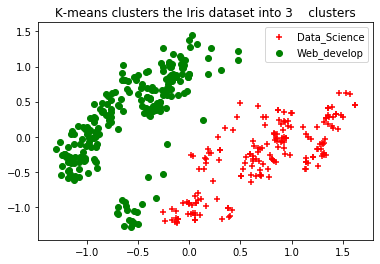

In [382]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  
pl.legend([c1,c2],['Data_Science', 'Web_develop'])
pl.title('K-means clusters the Iris dataset into 3    clusters')
pl.show()